In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import os
import glob

In [2]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9239710948860844873
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22722641920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12583124994924294961
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 22722641920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12044663189540884329
physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6"
xla_global_id: 2144165316
, name: "/device:GPU:2"
device_type: "GPU"
memory_limit: 22722641920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7167391154677974451
physical_device_desc: "device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6"
xla_global_id: 1651660799
, name: "/device:GPU

In [3]:
import os

# dataset 폴더 경로 설정
# dataset_folder = '/content/drive/MyDrive/LAB/Sign_Language_Remaster/code/lstm/dataset'
dataset_folder = r'C:\Users\oem\Desktop\jhy\dataset'

# dataset 폴더 아래의 모든 폴더 목록을 얻기
folder_names = [folder for folder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, folder))]

# 결과 출력
print(len(folder_names), folder_names)


['(Shooting gun)', '-jean', 'Acacia flower', 'alcohol', 'Anatomy', 'Anniversary', 'army unit', 'attache', 'Be persistent', 'bone', 'bribe', 'Celadon', 'Central office', 'chewing gum', 'Come across', 'confrontation', 'copy machine', 'Defender', 'describe', 'during', 'engine', 'entrust', 'far', 'Federation', 'Final exam', 'fire extinguisher', 'Football field', 'Gold', 'Han River', 'hide', 'hold out', 'Hole', 'hot', 'House price', 'ignorance', 'Indifference', 'Insert', 'Installment', 'Kalguksu', 'keep', 'law', 'Laziness', 'let go', 'lie', 'like', 'limp', 'lyrics', 'manicure', 'Mate', 'Material', 'meeting', 'Money', 'Monthly', 'My week', 'Navy', 'oblivion', 'Octopus', 'One hundred', 'one room', 'Outstream', 'persimmon', 'Photographer', 'Placebo', 'pot', 'Poverty', 'power plant', 'pregnancy', 'real', 'report', 'safe', 'school', 'see', 'seizure', 'Seokdu', 'Seventh', 'seventy', 'Sgt', 'shave', 'shed', 'Small trial', 'South Sea', 'spin', 'Stickiness', 'struggle', 'tie', 'To Wipe', 'Train stat

In [4]:
import numpy as np
from tqdm import tqdm
actions = folder_names
label_mapping = {action: idx for idx, action in enumerate(actions)}

#  = '/content/drive/MyDrive/LAB/Sign_Language_Remaster/code/lstm/dataset'
PATH = r'C:\Users\oem\Desktop\jhy\dataset'

data = []
labels = []

for action in tqdm(actions):
    PATH2 = f'{PATH}/{action}'
    file_path = glob.glob(os.path.join(PATH2, f'seq_*.npy'))[0]
    try:
        loaded_data = np.load(file_path, allow_pickle=True)
        data.append(loaded_data)

        label = np.full((loaded_data.shape[0],), label_mapping[action])
        labels.append(label)
    except FileNotFoundError:
        print(f"File not found for action: {action}")

x_data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)


100%|██████████| 96/96 [00:04<00:00, 19.69it/s]


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(230256, 96)

In [6]:
from sklearn.model_selection import train_test_split

# data를 train과 test로 나눔
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# x_train, x_test, y_train, y_test의 크기 확인
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (184204, 30, 156)
y_train shape: (184204, 96)
x_test shape: (46052, 30, 156)
y_test shape: (46052, 96)


In [13]:
#model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='tanh', input_shape=x_train.shape[1:3]),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                24192     
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 24,522
Trainable params: 24,522
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=x_train.shape[1:3]),
    Dropout(0.5),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='tanh'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 128)           145920    
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

EPOCHS = 50

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    shuffle = False,
    # callbacks=[
    #     ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
    #     ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    # ]
)

Epoch 1/50
5757/5757 [==============================] - 146s 24ms/step - loss: 0.8765 - acc: 0.7575 - val_loss: 0.2297 - val_acc: 0.9347
Epoch 2/50
5757/5757 [==============================] - 135s 23ms/step - loss: 0.2699 - acc: 0.9225 - val_loss: 0.1292 - val_acc: 0.9621
Epoch 3/50
5757/5757 [==============================] - 139s 24ms/step - loss: 0.1960 - acc: 0.9422 - val_loss: 0.1090 - val_acc: 0.9678
Epoch 4/50
5757/5757 [==============================] - 137s 24ms/step - loss: 0.1557 - acc: 0.9531 - val_loss: 0.0805 - val_acc: 0.9731
Epoch 5/50
5757/5757 [==============================] - 139s 24ms/step - loss: 0.1365 - acc: 0.9582 - val_loss: 0.0646 - val_acc: 0.9787
Epoch 6/50
5757/5757 [==============================] - 140s 24ms/step - loss: 0.1188 - acc: 0.9635 - val_loss: 0.0524 - val_acc: 0.9829
Epoch 7/50
5757/5757 [==============================] - 139s 24ms/step - loss: 0.1079 - acc: 0.9669 - val_loss: 0.0466 - val_acc: 0.9844
Epoch 8/50
5757/5757 [===================

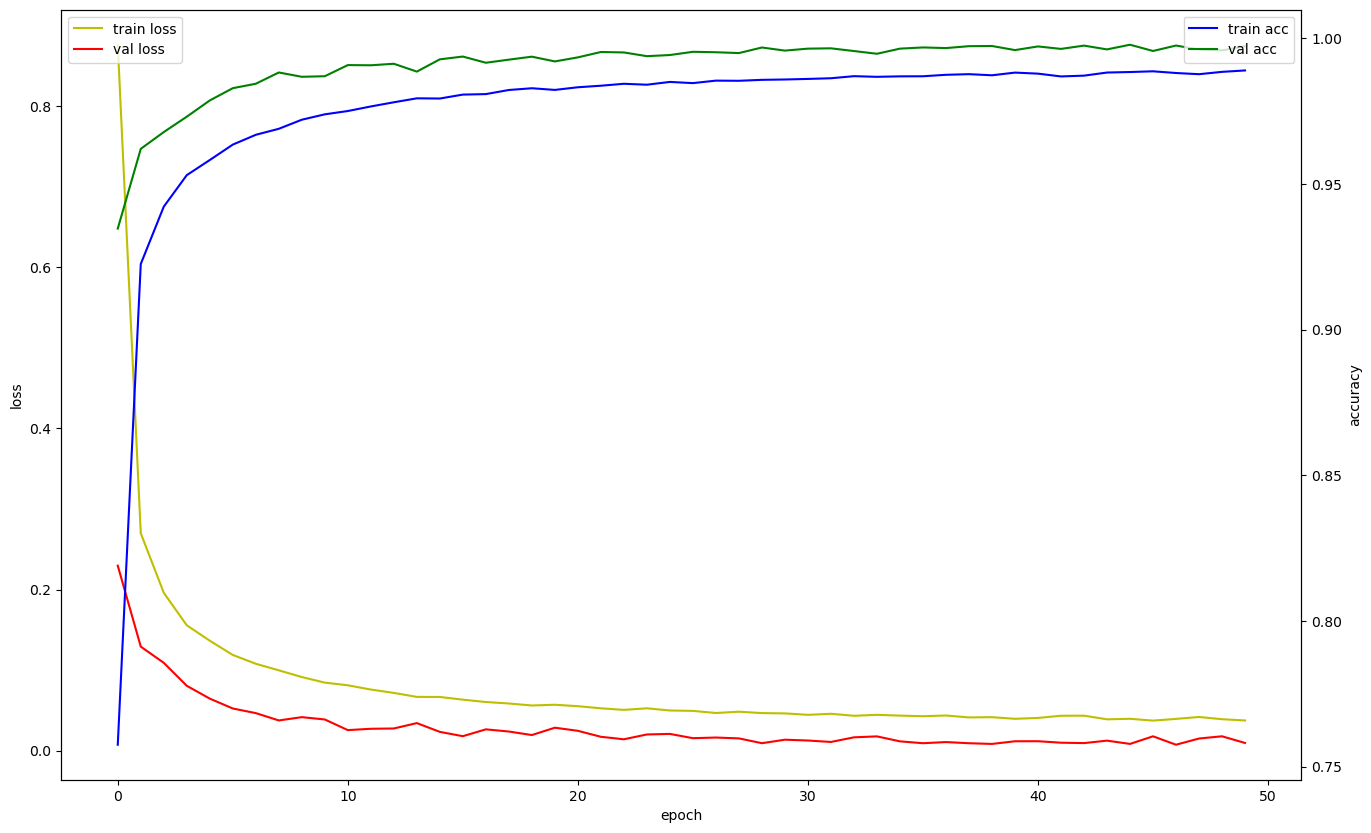

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [11]:
# model.save(f'/content/drive/MyDrive/LAB/Sign_Language_Remaster/model/lstm_test21_{len(actions)}_e{EPOCHS}.h5')
model.save(f'C:/Users/oem/Desktop/jhy/signlanguage/Sign_Language_Remaster/model/lstm_test30_{len(actions)}act_e{EPOCHS}.h5')

In [12]:
from sklearn.metrics import accuracy_score
# model = load_model(f'/content/drive/MyDrive/Sign_Remaster/Sign_Language_Remaster/model/lstm_test8_e100.h5')
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)


Accuracy: 0.9973073916442282
